In [11]:
import pywt
import matplotlib.image as mpimg
img = mpimg.imread('/home/priyam/Documents/Dataset/Database/20234/1.jpg')

In [21]:
def dwt_transform(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, dsize=(224, 224))
    c = pywt.wavedec2(gray_image, 'haar', mode='periodization', level=1)
    cA1 = c[0]
    (cH1, cV1, cD1) = c[-1]
    transformed = np.concatenate((np.concatenate((cA1, cV1)), np.concatenate((cH1, cD1))), axis=1)
    arr1 = np.std(transformed, axis=0)
    arr2 = np.std(transformed, axis=1)
    arr3 = np.concatenate((arr1, arr2))
    return arr3

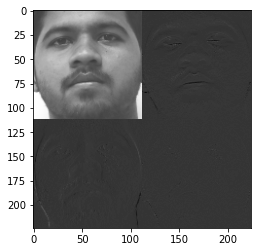

In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
a = dwt_transform(img)
plt.imshow(a, cmap=plt.cm.gray)

In [28]:
import os
X = []
y = []
test_dir = '/home/priyam/Documents/Dataset/Database'
for img_folder in os.listdir(test_dir):
    for img_file in os.listdir(os.path.join(test_dir, img_folder)):
        img_path = os.path.join(test_dir,img_folder,img_file)
        img = mpimg.imread(img_path)
        a = dwt_transform(img)
        X.append(a)
        y.append(img_folder)

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
X.shape

(360, 448)

In [43]:
y.shape

(360,)

### Method 1: Similarity

In [51]:
sim_mat = []
test_img_path = '/home/priyam/Downloads/Database/Database/20233/8.jpg'
test_img = mpimg.imread(test_img_path)
test_dwt = dwt_transform(test_img)
for i in X:
    sim_mat.append(np.linalg.norm((i-test_dwt), ord=1))
idx = np.argmin(sim_mat)
a_sort = np.argsort(sim_mat)[:5]
print(y[idx])
print(y[a_sort])

20233
['20233' '20204' '20206' '20244' '20226']


### Method 2: Deep Learning

In [98]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(45, activation='softmax')
])

In [99]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [100]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
y_one_hot = one_hot.fit_transform(y.reshape(-1, 1))

In [101]:
y_one_hot = y_one_hot.toarray()

In [102]:
y_one_hot.shape

(360, 45)

In [103]:
model.fit(X, y_one_hot, epochs=200)

Epoch 1/200
12/12 [==============================] - 0s 1ms/step - loss: 25.6541 - accuracy: 0.0250
Epoch 2/200
12/12 [==============================] - 0s 1ms/step - loss: 6.2507 - accuracy: 0.0222
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 4.7235 - accuracy: 0.0306
Epoch 4/200
12/12 [==============================] - 0s 1ms/step - loss: 4.3839 - accuracy: 0.0167
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 4.0603 - accuracy: 0.0278
Epoch 6/200
12/12 [==============================] - 0s 1ms/step - loss: 3.9076 - accuracy: 0.0417
Epoch 7/200
12/12 [==============================] - 0s 1ms/step - loss: 3.9131 - accuracy: 0.0639
Epoch 8/200
12/12 [==============================] - 0s 1ms/step - loss: 3.7653 - accuracy: 0.0417
Epoch 9/200
12/12 [==============================] - 0s 1ms/step - loss: 3.9176 - accuracy: 0.0583
Epoch 10/200
12/12 [==============================] - 0s 1ms/step - loss: 3.7892 - accuracy: 0.0417
Epoch 11

In [104]:
# sim_mat = []
test_img_path = '/home/priyam/Downloads/Database/Database/20233/8.jpg'
test_img = mpimg.imread(test_img_path)
test_dwt = dwt_transform(test_img)
test_dwt = test_dwt.reshape((1, -1))
predictions = model.predict(test_dwt)

1/1 [==============================] - 0s 34ms/step


In [111]:
idx = np.argmax(predictions)
print(y[idx])

20217
